In [1]:
# Definisem za svaki od filtera po jednu funkciju, koja prima putanju slike
# Rezultujucu sliku cuva u obliku: orig_ime_ImeFiltera.jpg u folderu Rezultati/Glacanje
# Na kraju pravim i figuru koja ce da sadrzi sve rezultate, uporedjene

from PIL import Image as img
from PIL import ImageChops
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import os
import math

%matplotlib inline
plt.style.use ('dark_background')

In [2]:
def primeni_filter (n_filter, putanja_slike, ime_filtera, ime_slike):
    
    n_filter = np.array (n_filter)
    
    slika = img.open (putanja_slike).convert ('L')
    slika_mat = slika.load()
    sirina = slika.size[0]
    visina = slika.size[1]
    
    rez = img.new ('L', (sirina, visina))
    rez_mat = rez.load()
    
    if ime_filtera == 'Medijana':
        vel_filtera = 3
    else:
        vel_filtera = len (n_filter)
    
    if ime_filtera == 'Medijana':
        # Krecemo se po pikselima i primenjujemo filter
        for red in range (sirina - vel_filtera):
            for kolona in range (visina - vel_filtera):
                
                R = []
                
                for i in range (vel_filtera):
                    for j in range (vel_filtera):
                        
                        tmp = slika_mat [red + i, kolona + j]
                        R.append (tmp)
                
                rez_mat[red + 1, kolona + 1] = int(np.median (np.array(R)))
    
    else:
        # Krecemo se po pikselima i primenjujemo filter
        for red in range (sirina - vel_filtera):
            for kolona in range (visina - vel_filtera):
                
                R = 0.0
                
                for i in range (vel_filtera):
                    for j in range (vel_filtera):
                        
                        tmp = slika_mat [red + i, kolona + j]
                        R += n_filter[i][j] * tmp
                
                rez_mat[red + 1, kolona + 1] = int (R)
        
    rez.save (os.path.join ('Rezultati', 'Glacanje', ime_slike + '_' + ime_filtera + '.jpg'))


In [3]:
# Velicina filtera je u teoriji proizvoljna, ja uzimam 5x5
def Prosek_filter (putanja_slike, ime_slike):
    
    p_filter = (1.0/25) * np.array([[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]])
    primeni_filter (p_filter, putanja_slike, 'Prosek', ime_slike)

def Medijana_filter (putanja_slike, ime_slike):
    
    primeni_filter ([], putanja_slike, 'Medijana', ime_slike)

def Gausov_filter (putanja_slike, ime_slike):
    
    p_filter = (1.0/256) * np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 42], [6, 24, 36, 24, 6], [4, 16, 24, 16, 42], [1, 4, 6, 4, 1]])
    primeni_filter (p_filter, putanja_slike, 'Gausov', ime_slike)


In [4]:
def poredjenje (lista_filtera):
    
    dir_putanja_rez = os.path.join ('Rezultati', 'Glacanje')
    dir_putanja_ulaz = os.path.join ('Slike', 'Glacanje slike')
    lista_imena_ulaz = sorted(os.listdir (dir_putanja_ulaz))
    lista_imena_rez = sorted(os.listdir (dir_putanja_rez))
    
    broj_slika = len (lista_imena_rez)
    broj_filtera = len (lista_filtera)
    i = 0  # Brojac originala
    j = 0  # Brojac rezultata
    k = 0  # Globalni brojac
    
    fig, ax = plt.subplots (int(broj_slika / broj_filtera), broj_filtera + 1, figsize = (35, 50))
    
    for ax_i in ax:
        
        for ax_j in ax_i:
            
            if (k % 4 == 0):
                putanja_slike = os.path.join (dir_putanja_ulaz, lista_imena_ulaz[i])
                ax_j.set_title (str.split(lista_imena_ulaz[i], '.')[0])
                i += 1
            
            else:
                putanja_slike = os.path.join (dir_putanja_rez, lista_imena_rez[j])
                ax_j.set_title (str.split(str.split (lista_imena_rez[j], '_')[-1], '.')[0])
                j += 1
            
            
            slika = mpimg.imread (putanja_slike)
            ax_j.imshow (slika, cmap = 'gray')
            ax_j.axis ('off')
            k += 1
    
    plt.show()


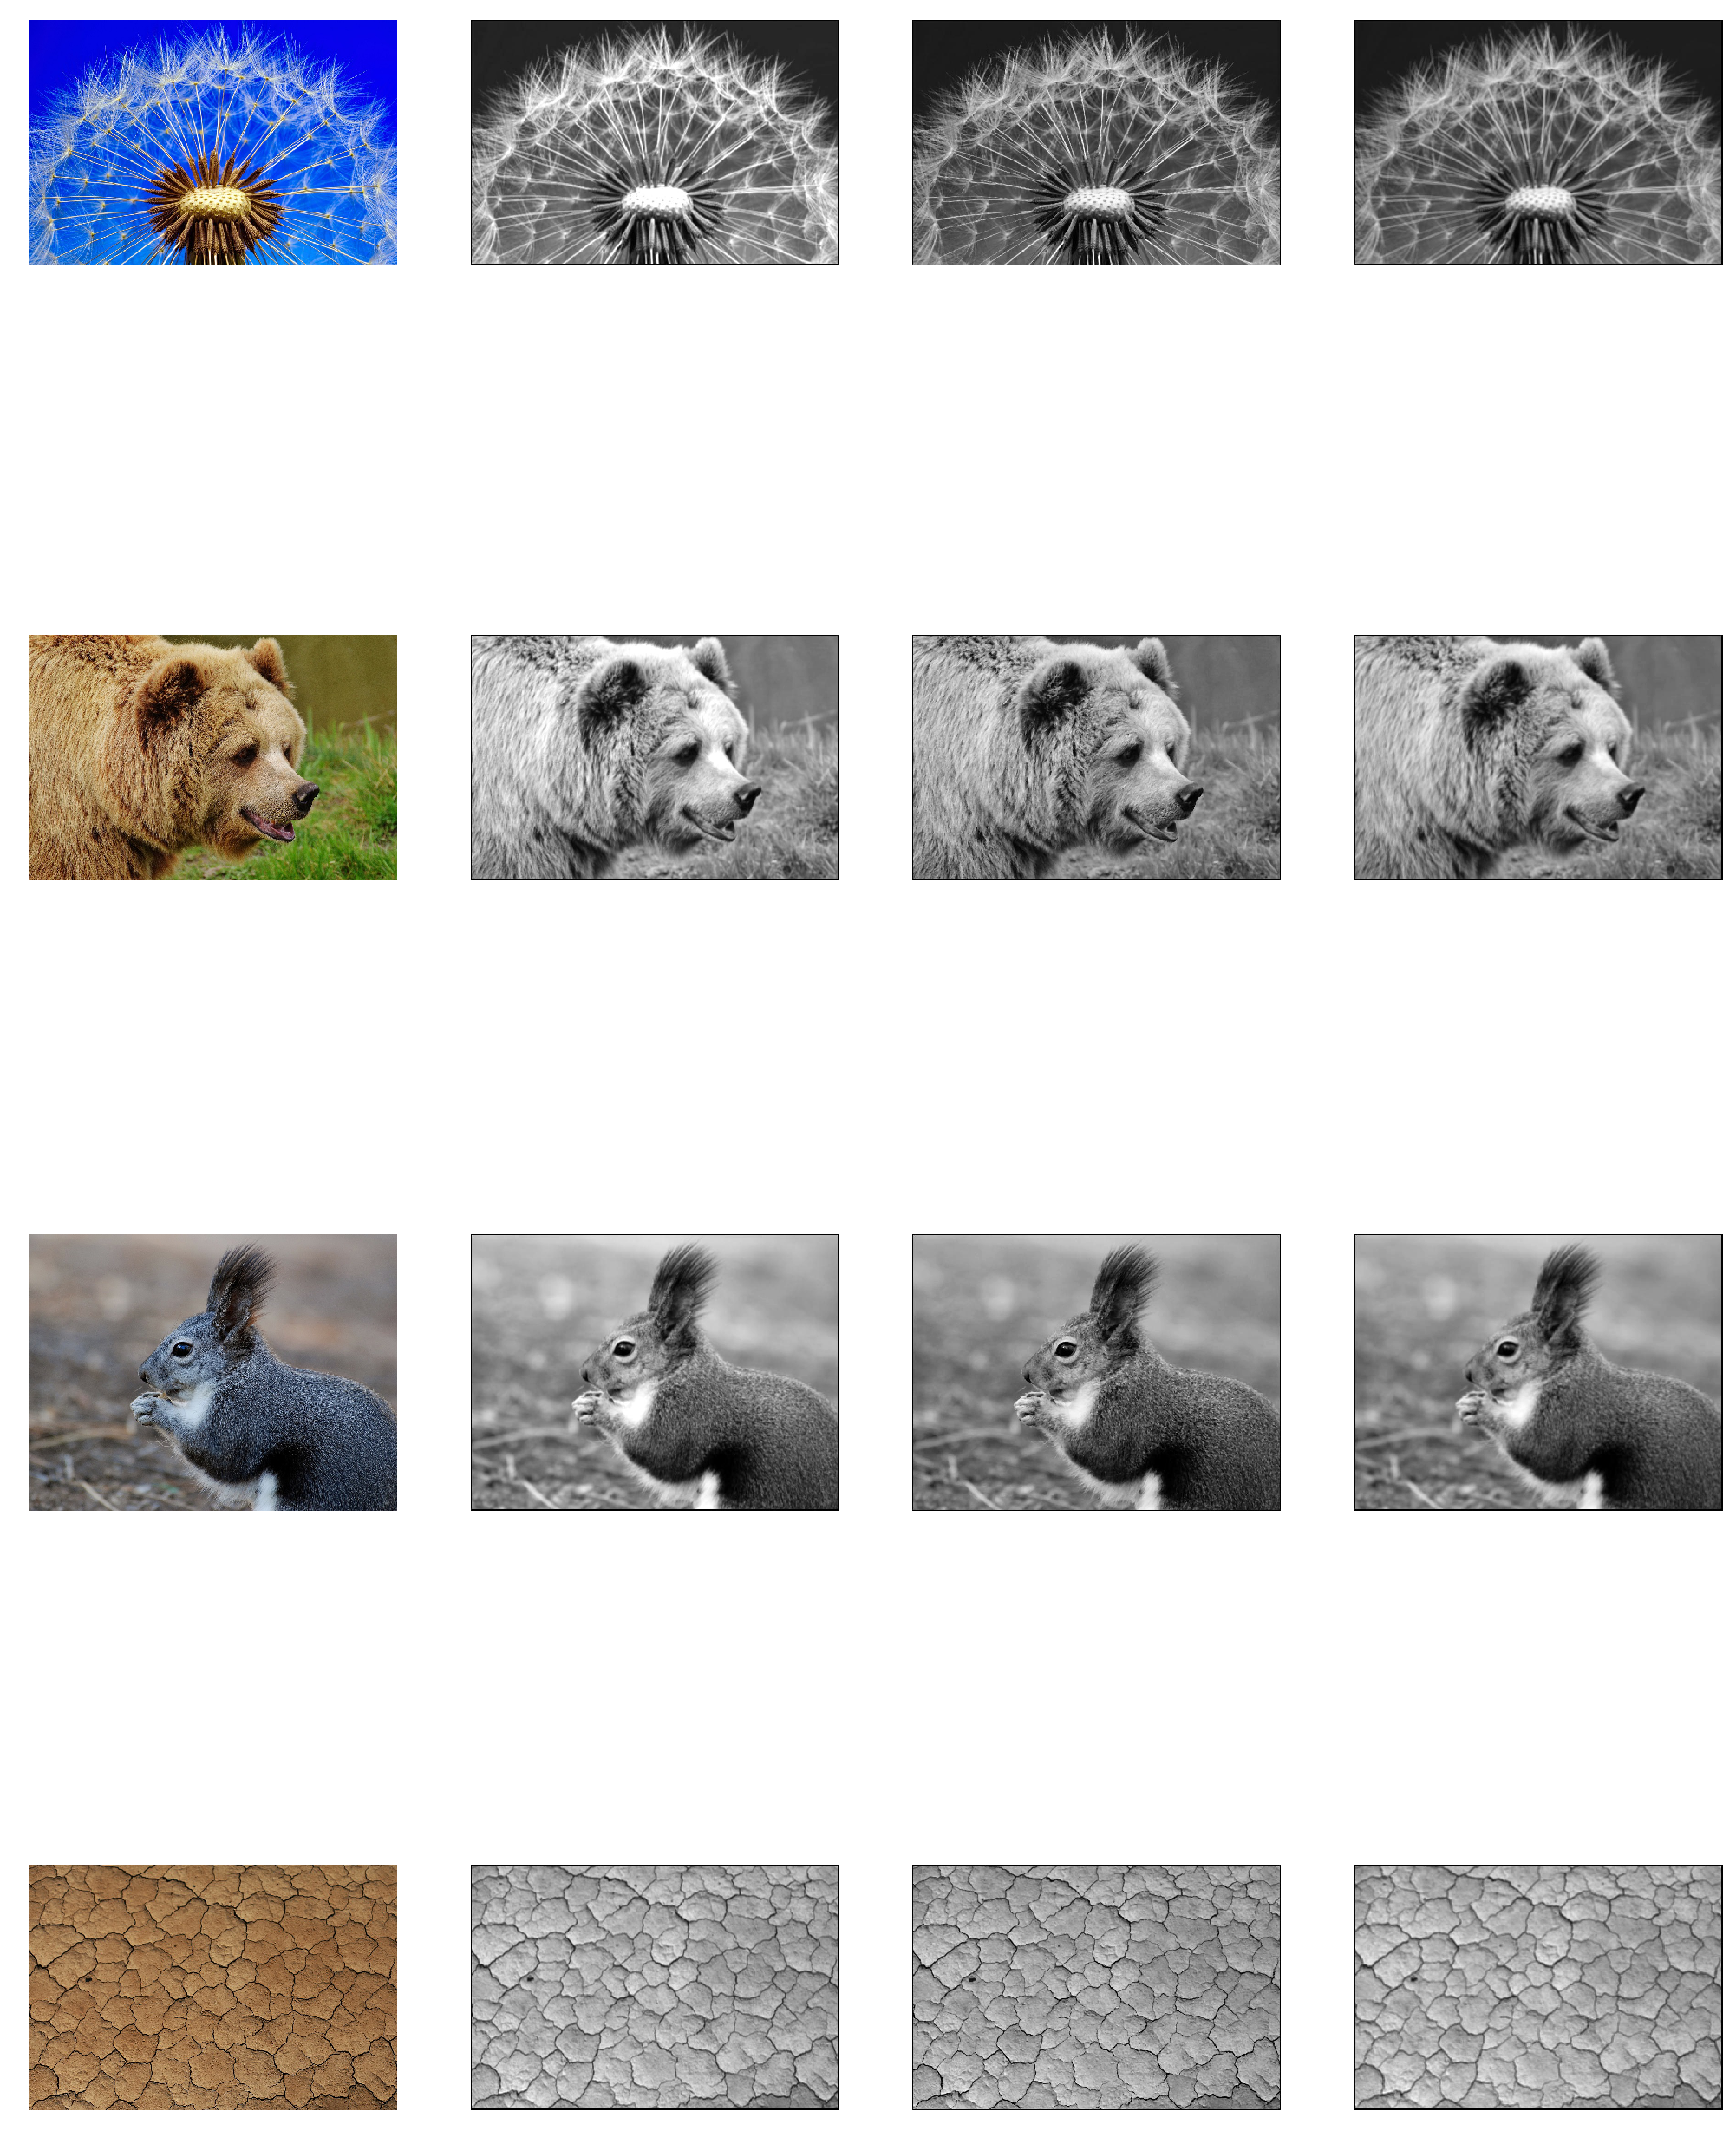

In [5]:
def main():
    
    dir_putanja = os.path.join ('Slike', 'Glacanje slike')
    
    for ime_slike in os.listdir(dir_putanja):
        if os.path.splitext(ime_slike)[-1] == '.jpg':
            Prosek_filter (os.path.join (dir_putanja, ime_slike), os.path.splitext (ime_slike)[-2])
            Medijana_filter (os.path.join (dir_putanja, ime_slike), os.path.splitext (ime_slike)[-2])
            Gausov_filter (os.path.join (dir_putanja, ime_slike), os.path.splitext (ime_slike)[-2])
    
    poredjenje (['Gausov', 'Medijana', 'Prosek'])

if __name__ == '__main__':
    main()